In [1]:
!pip install torch
!pip install torchvision
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np
from torchvision import datasets, transforms
import torch.nn.functional as F

from AgeDatasetLoader import AgeDataset

In [2]:
age_train = AgeDataset("age_data/age-train.csv")
loader_train = DataLoader(age_train, batch_size=32, shuffle=True, num_workers=2)

age_val = AgeDataset("age_data/age-val.csv")
loader_val = DataLoader(age_val, batch_size=32, shuffle=True, num_workers=2)


age_test = AgeDataset("age_data/age-test.csv")
loader_test = DataLoader(age_test, batch_size=32, shuffle=True, num_workers=2)

In [3]:
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [4]:
# instantiate the model
n_inputs = 48*48 # makes a 1D vector of 784
n_outputs = 24
log_regr = LogisticRegression(n_inputs, n_outputs)

In [5]:
# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining CrossaEntropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(loader_train):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 48*48))
        loss = criterion(outputs, labels.argmax(dim=1))
        #loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    total = 0
    for images, labels in loader_test:
        outputs = log_regr(images.view(-1, 48*48))
        _, predicted = torch.max(outputs.data, 1)
       # correct += (predicted == labels).sum()
  
        correct += (predicted == labels.argmax(dim=1)).sum().item() # Convert labels to indices
        total += labels.size(0)
    accuracy = (correct) / total
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 12098.3623046875. Accuracy: 0.12007874015748031
Epoch: 1. Loss: 7805.19482421875. Accuracy: 0.09055118110236221
Epoch: 2. Loss: 15475.5. Accuracy: 0.1906636670416198
Epoch: 3. Loss: 10611.57421875. Accuracy: 0.23818897637795275
Epoch: 4. Loss: 9498.486328125. Accuracy: 0.1982564679415073
Epoch: 5. Loss: 5915.68994140625. Accuracy: 0.14595050618672667
Epoch: 6. Loss: 3540.594482421875. Accuracy: 0.1782902137232846
Epoch: 7. Loss: 10623.447265625. Accuracy: 0.18982002249718785
Epoch: 8. Loss: 7307.83642578125. Accuracy: 0.14595050618672667
Epoch: 9. Loss: 8403.095703125. Accuracy: 0.1279527559055118
Epoch: 10. Loss: 7391.05224609375. Accuracy: 0.16141732283464566
Epoch: 11. Loss: 4824.2705078125. Accuracy: 0.19516310461192352
Epoch: 12. Loss: 3316.649169921875. Accuracy: 0.17997750281214847
Epoch: 13. Loss: 7354.94287109375. Accuracy: 0.2907761529808774
Epoch: 14. Loss: 4795.71240234375. Accuracy: 0.2013498312710911
Epoch: 15. Loss: 9161.90234375. Accuracy: 0.162823397075

In [6]:
for images, labels in loader_train:
    print(images.shape, labels.shape)
    break

torch.Size([32, 1, 48, 48]) torch.Size([32, 24])


In [13]:
print(sum(acc)/len(acc))

0.19779527559055118


Matplotlib is building the font cache; this may take a moment.


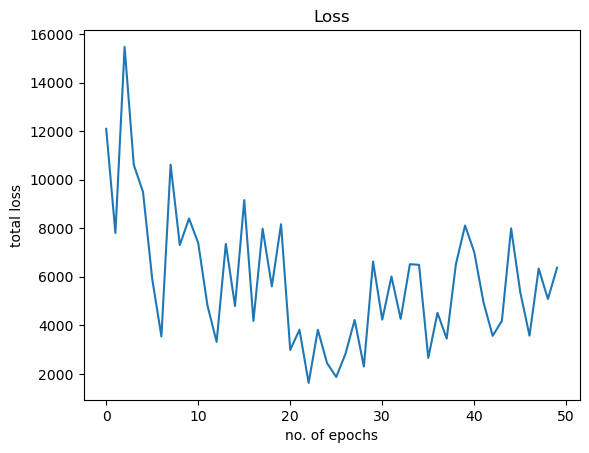

In [19]:
import matplotlib.pyplot as plt

plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

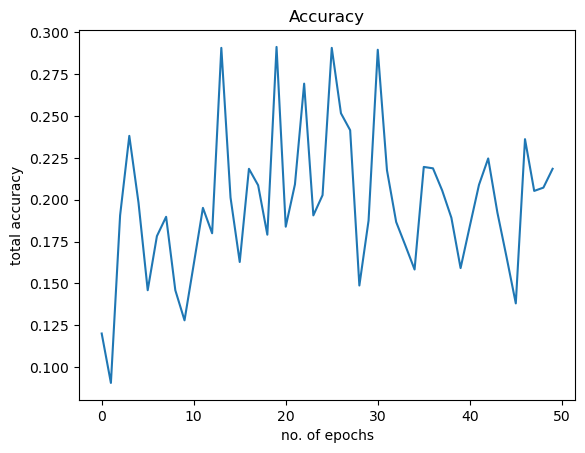

In [21]:

plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()